# Sentiment Analysis
**By Jayden Nyamiaka**

In this notebook, we will gain experience with basic Sentiment Analysis using Python's vaderSentiment module. Using vaderSentiment, we can achieve a numeric representation of human sentiment, allowing us to quantify the way people feel and extract meaningful insights from natural language in a simple way. 

For this notebook, we will work with a large JSON file containing Amazon reviews and ratings for roughly 800,000 patios and extract sentiment scores from the user reviews. The file is too large to store on GitHub, so it is not in this directory. Instead, download it from this Dropbox link: https://www.dropbox.com/scl/fi/u6lewn1beg51kv0kd66kh/hw-6-dataset2.json?rlkey=1oypuzxbg4af7hazj9gdxpvbi&st=izqxxpke&dl=0

In [2]:
# Imports
import pandas as pd
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import data
filename = "amazon_reviews.json"
df = pd.read_json(filename, lines=True)

## View sample of the data
print(df.head())

   overall vote  verified   reviewTime      reviewerID        asin  \
0        5    2      True  12 11, 2011   AUVPE2KEXBJVT  9539723809   
1        5  NaN      True  07 30, 2011  A2F6GES1MBOFXS  9539723809   
2        5  NaN      True   05 4, 2016  A1SDVD3SZI1BAK  9539723809   
3        5  NaN      True   11 2, 2015  A1ZQJ3KCSLUPR3  9539723809   
4        5  NaN      True   09 1, 2015   ANU8FBZM618M3  9539723809   

         reviewerName                                         reviewText  \
0         T. E. Kainz  I don't spend a lot on my flags because they r...   
1         BluesJamJim  Super fast processing and shipping, if you are...   
2  Gabriel M Martinez  Great product.  I would recommend this product...   
3       RAJ THE FLASH            GREAT PRICE I LOVE MY STATE AND COUNTRY   
4      James R. Mills                    Great display flag for the den.   

                      summary  unixReviewTime style image  
0  Good quality for the price      1323561600   NaN   NaN  
1 

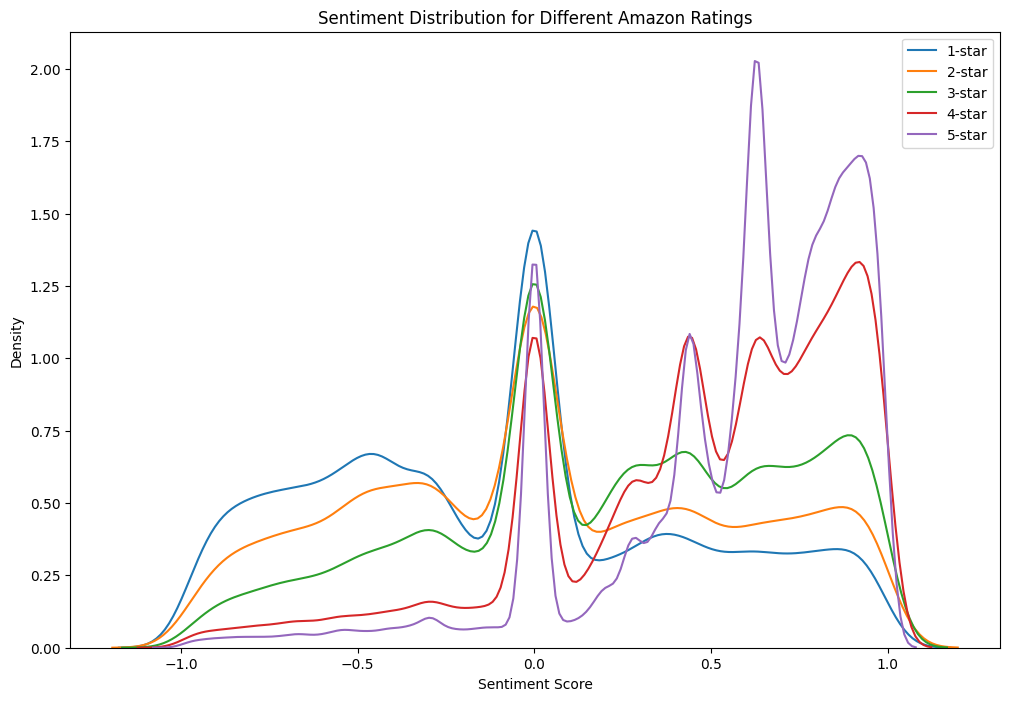

In [5]:
# DO SENTIMENT ANALYSIS

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def compute_compound_sentiment_score(review):
    return analyzer.polarity_scores(str(review))['compound']

df['sentiment'] = df['reviewText'].apply(compute_compound_sentiment_score)

# Plot the distribution of sentiment scores for each Amazon rating
plt.figure(figsize=(12, 8))

for rating in range(1, 6):
    subset = df[df['overall'] == rating]
    sns.kdeplot(subset['sentiment'], label=f'{rating}-star')

plt.title('Sentiment Distribution for Different Amazon Ratings')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In the distributions above, we see that the higher star ratings have higher positive sentiment score near 1 and the lower star ratings have higher negative sentiment scores closer to -1. This is trivially what we would expect from people's ratings -- higher ratings tend to be more positive on average and vice versa. We can also note that there is a bias toward positive sentiment. The relative ordering of the star ratings is as we expect and matching the previously stated pattern; however, for the higher sentiment scores, all the ratings tend to be higher. I think this can be explained by the tendency for people to be more positive even when critiquing things rather than being mean about things they are already rating lowly. The spike at 0 was also expected because many people tend to describe things neutrally even regardless of how they feel about it. This sentiment analysis is generally what was expected. The only thing unexpected is the 5-star distribution spike around sentiment score 0.6. I don't see any obvious explanation for this. 